# Análisis de Probabilidad y Visualización

En este notebook, realizaremos un análisis de probabilidades utilizando los datos de una encuesta. Usaremos librerías avanzadas para cálculos y gráficos:
- **pandas**: Para manipulación de datos.
- **NumPy**: Para cálculos numéricos y probabilidades.
- **matplotlib** y **seaborn**: Para gráficos atractivos.

## Objetivos:
1. Calcular probabilidades marginales, condicionales y conjuntas.
2. Verificar independencia entre eventos.
3. Representar visualmente los resultados de manera clara y profesional.

---


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")




# **5. Introducción a la Probabilidad**

En esta sección, abordaremos problemas básicos de probabilidad basados en los datos de la encuesta. Los problemas incluyen probabilidades simples, conjuntas y condicionales, así como simulaciones.

---


## **Problema 1: Probabilidad de Nivel Avanzado en IA**

### Descripción:
Calculamos la probabilidad de que un participante tenga un nivel avanzado en Inteligencia Artificial (IA). Esto se basa en el número total de encuestados y la cantidad de participantes con nivel avanzado en IA.

**Relación con el Tema:**  
Introduce conceptos de probabilidad simple utilizando frecuencias relativas.

---


In [2]:
# Calcular probabilidad simple
advanced_ia = df['¿Cuál es tu nivel de conocimiento sobre Inteligencia Artificial (IA)? '] == 'Avanzado'
prob_advanced_ia = advanced_ia.sum() / len(df)

# Mostrar resultado
print(f"La probabilidad de nivel avanzado en IA es: {prob_advanced_ia:.2%}")


La probabilidad de nivel avanzado en IA es: 13.33%


## **Problema 3: Probabilidad Condicional (Mujer dado Nivel Avanzado en ML)**

### Descripción:
Determinamos la probabilidad de que un participante sea mujer dado que tiene nivel avanzado en Machine Learning (ML). Este es un ejemplo de probabilidad condicional.

**Relación con el Tema:**  
Aplica conceptos de probabilidad condicional basados en subconjuntos de datos.

---


In [3]:
# Filtrar datos
advanced_ml = df['¿Cuál es tu nivel de conocimiento sobre Machine Learning (ML)? '] == 'Avanzado'
women = df['Genero'] == 'Femenino'

# Calcular probabilidad condicional
if advanced_ml.sum() > 0:
    prob_women_given_advanced_ml = (advanced_ml & women).sum() / advanced_ml.sum()
    print(f"La probabilidad de que un participante sea mujer dado ML avanzado es: {prob_women_given_advanced_ml:.2%}")
else:
    print("No hay participantes con nivel avanzado en ML.")


No hay participantes con nivel avanzado en ML.


# **6. Distribuciones de Probabilidad**

En esta sección, modelamos distribuciones discretas (como la binomial) y evaluamos cómo se ajustan a los datos reales. También analizamos probabilidades acumuladas y simulaciones.

---


## **Problema 1: Modelar con Distribución Binomial**

### Descripción:
Modelamos las respuestas de la pregunta "¿Qué tan actualizado te consideras?" utilizando una distribución binomial, considerando los niveles como éxitos y fracasos.

**Relación con el Tema:**  
Este problema muestra cómo ajustar una distribución discreta a datos categóricos.

---


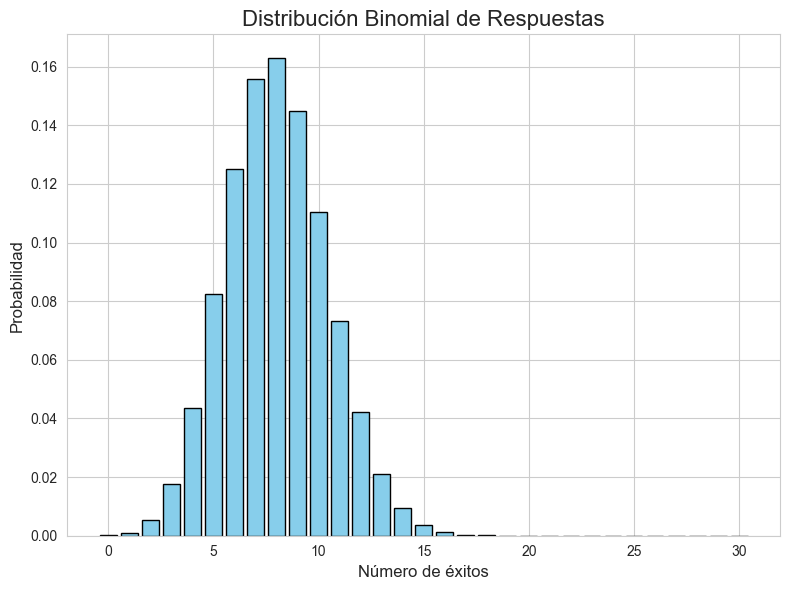

In [8]:
from scipy.stats import binom

# Parámetros para la distribución binomial
n = len(df)
p = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].value_counts(normalize=True)['Bastante']

# Generar distribución binomial
x = np.arange(0, n + 1)
binomial_pmf = binom.pmf(x, n, p)

# Gráfica de la distribución
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_pmf, color='skyblue', edgecolor='black')
plt.title("Distribución Binomial de Respuestas", fontsize=16)
plt.xlabel("Número de éxitos", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.tight_layout()
plt.show()


## **Problema 4: Probabilidad Acumulada hasta Nivel Intermedio en Blockchain**

### Descripción:
Calculamos la probabilidad acumulada hasta nivel intermedio en Blockchain usando una distribución binomial basada en los datos reales.

**Relación con el Tema:**  
Utiliza la función acumulativa de probabilidad para analizar la suma de probabilidades hasta un punto específico.

---


In [ ]:
# Filtrar datos para niveles hasta "Intermedio"
blockchain_levels = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? ']
success_count = blockchain_levels.isin(['Ninguno', 'Básico', 'Intermedio']).sum()

# Calcular probabilidad acumulada
p = success_count / len(df)
cumulative_prob = binom.cdf(success_count, n, p)

print(f"La probabilidad acumulada hasta nivel intermedio en Blockchain es: {cumulative_prob:.2%}")


# **7. Distribuciones de Probabilidad Continuas**

En esta sección, ajustamos distribuciones continuas a los datos y calculamos probabilidades acumuladas. Analizamos las edades y otros datos numéricos.

---


## **Problema 1: Modelar Edades con Distribución Normal**

### Descripción:
Modelamos la distribución de las edades utilizando una distribución normal, ajustándola con la media y desviación estándar de los datos.

**Relación con el Tema:**  
Demuestra cómo relacionar datos reales con distribuciones continuas.

---


In [ ]:
from scipy.stats import norm

# Calcular media y desviación estándar
mean_age = df['Edad'].mean()
std_age = df['Edad'].std()

# Generar distribución normal
x = np.linspace(df['Edad'].min(), df['Edad'].max(), 100)
normal_pdf = norm.pdf(x, mean_age, std_age)

# Gráfica
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad'], kde=False, bins=15, color='purple', stat='density', label='Datos reales')
plt.plot(x, normal_pdf, color='red', label='Distribución Normal Ajustada')
plt.title("Distribución Normal de Edades", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


## **Problema 2: Probabilidad de Edad Mayor a 30**

### Descripción:
Calculamos la probabilidad de que un participante tenga más de 30 años utilizando la distribución normal ajustada.

**Relación con el Tema:**  
Aplicamos propiedades de la distribución normal para calcular probabilidades acumuladas.

---


In [ ]:
# Calcular probabilidad acumulada para edades mayores a 30
prob_greater_30 = 1 - norm.cdf(30, mean_age, std_age)

print(f"La probabilidad de que un participante tenga más de 30 años es: {prob_greater_30:.2%}")
